<a href="https://colab.research.google.com/github/RiaKokate/VIS/blob/main/vis_PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌬️ Tracking the Breath of a Nation: A 40-Year Journey Through America’s Air**
A Data-Driven Exploration of Air Quality, Pollution, and Public Health (1980–2022)

---



“We breathe over 20,000 times a day — but what exactly are we inhaling? Over 40 years, has our air improved or become more toxic?”

# Overview/Abstract
Air quality has long been a critical public health concern, with rising concerns around its impact on chronic respiratory diseases and overall life expectancy. This project explores air pollution trends across the United States from 1980 to 2022, with a focus on the spatial and temporal patterns of AQI (Air Quality Index) and their correlations with health outcomes such as asthma and lung cancer.

We have integrated multiple data sources — including pollutant-specific AQI levels, disaster frequency, CO₂ emissions, and mortality data — to identify pollution hotspots, examine pollutant-health links, and forecast air quality through 2050 using the Prophet model.

The project aims to answer: **Are we doing enough to secure breathable air for the future?**

# Research Questions
* How has the overall AQI evolved across U.S. states from 1980 to 2022?

* Which pollutants (PM2.5, O₃, NO₂, etc.) have had the greatest impact on air quality and health outcomes?

* How do pollutant levels vary geographically, and which states are most vulnerable?

* Is there a measurable relationship between air pollution and respiratory illness (e.g., asthma, lung cancer)?

* What might air quality look like by 2050?


# Significance:
Why this matters: **Air quality isn’t just environmental — it's about survival.**

🧩 Policy Implications

Findings can aid policymakers in designing targeted and evidence-based pollution control strategies by identifying pollutant-specific and region-specific concerns.

💊 Public Health Interventions

The strong correlations between pollutant levels and asthma/lung cancer mortality can inform healthcare providers and public health officials about vulnerable populations and promote early interventions in high-risk regions.

🧠 Awareness & Education

By visualizing the long-term trends and health outcomes of poor air quality, the project raises public awareness and helps citizens understand the personal and community-level impacts of pollution.

📈 Forecast-Driven Planning

The Prophet-based forecast allows planners and environmental agencies to anticipate future air quality challenges, enabling proactive decision-making instead of reactive policy.

📍 Resource Allocation

The identification of pollution hotspots and health impact zones can guide more efficient allocation of environmental funds, hospital resources, and air monitoring infrastructure.

#References

🗺️ Data & Tools Cited

* [World Pollution Data](https://public.opendatasoft.com/explore/dataset/worldwide-pollution/table/?disjunctive.country&disjunctive.filename)
* US Mortality Data
* AQI Data (2020-2024)
* [Historical AQI Data (1980-2022)](https://www.epa.gov/)

Related Research Papers:
* Burke, M., Driscoll, A., Heft-Neal, S., et al. (2021).
The changing risk and burden of wildfire smoke in the United States.
Proceedings of the National Academy of Sciences, 118(2).
https://doi.org/10.1073/pnas.2011043118

      ➤ Examines how climate change is increasing wildfire smoke exposure — highly relevant to your AQI + disaster visuals.
* Cohen, A.J., Brauer, M., Burnett, R., et al. (2017).
Estimates and 25-year trends of the global burden of disease attributable to ambient air pollution.
The Lancet, 389(10082), 1907–1918.
https://doi.org/10.1016/S0140-6736(17)30505-6

      ➤ Globally recognized study linking PM2.5 and O₃ exposure to asthma, lung cancer, and premature death.
* Taylor, S.J., & Letham, B. (2018).
Forecasting at Scale.
The American Statistician, 72(1), 37–45.
https://doi.org/10.1080/00031305.2017.1380080

      ➤ Introduces the Prophet model, used in your AQI forecasting section. Relevant to your methodology.

#Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

! wget -q -O World_Pollution_df.csv https://docs.google.com/uc?id=1JpdFVP_FzLTTTB8yEB_FMhrl5E0OPJBK&export=download
! wget -q -O US_PM25_Mort_data.csv https://docs.google.com/uc?id=10UiPxQdsfKhw5VsykyIAdYFbQATFnLRf&export=download
#! wget -q -O merged_set_data.csv https://docs.google.com/uc?id=1pF_hlqyPdGytXRZzI64ymVBGXRWlmzWw&export=download
#! wget -q -O Group_State_then_Year.csv https://docs.google.com/uc?id=1aFOjy16ohZRLv0bcK3Qygg-y-RL6dY3Q&export=download
! wget -q -O GDP_and_Personal_Income.csv https://docs.google.com/uc?id=1ciYLaWJXZeiEsw_JAwyvBfIHWKU1y5by&export=download
#! wget -q -O Chem_mean_by_Year.csv https://docs.google.com/uc?id=1XGJKQ3I1yod_S25tS-0W4VtqyH1hVFC6&export=download
#! wget -q -O Chem_mean_by_State.csv https://docs.google.com/uc?id=1IGS0V59iO4JPL49L61-eCTZKoU1OMXbv&export=download
! wget -q -O AQI_data.csv https://docs.google.com/uc?id=1ZNHMmBq-jxtXrbq6PPE3cDp0P436yayK&export=download
! wget -q -O new.csv https://docs.google.com/uc?id=1mQeYkZtbIZaTT61CwbJkfiTF_mcaXFjV&export=download
! wget -q -O combined_aqi_data_2020_2024.csv https://docs.google.com/uc?id=1ECzEzKaGHD6dcEfc0W_XiEVlrEG4pmNf&export=download

df = pd.read_csv("combined_aqi_data_2020_2024.csv") # 2020-2024

pm = pd.read_csv("US_PM25_Mort_data.csv")
new = pd.read_csv("new.csv") #1980-2022
pollution = pd.read_csv("World_Pollution_df.csv")
GDP = pd.read_csv("GDP_and_Personal_Income.csv")
aqi = pd.read_csv("AQI_data.csv")

In [ ]:
# Check for missing values
print(pm.isnull().sum())
print(new.isnull().sum())
print(df.isnull().sum())

Country     0
Variable    0
Year        0
Unit        0
Value       0
dtype: int64
Geo_Loc                                0
Year                                   0
State                                  0
Pop_Est                                0
TTL_Cnty                               0
Cnty_Rpt                               0
Dys_w_AQI                              0
Dys_NM                                 0
Dys_Blw_Thr                            0
Dys_Abv_Thr                            0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5     

In [ ]:
# Fill missing values if appropriate, or drop rows
pm = pm.dropna()
new = new.dropna()
df = df.dropna()

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Geo_Loc                              2193 non-null   object
 1   Year                                 2193 non-null   int64 
 2   State                                2193 non-null   object
 3   Pop_Est                              2193 non-null   int64 
 4   TTL_Cnty                             2193 non-null   int64 
 5   Cnty_Rpt                             2193 non-null   int64 
 6   Dys_w_AQI                            2193 non-null   int64 
 7   Dys_NM                               2193 non-null   int64 
 8   Dys_Blw_Thr                          2193 non-null   int64 
 9   Dys_Abv_Thr                          2193 non-null   int64 
 10  Good Days                            2193 non-null   int64 
 11  Moderate Days                        2193 n

In [ ]:
new.describe()

,Year,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,Good Days,Moderate Days,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,2193.000000,2.193000e+03,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,2001.000000,5.527642e+06,61.647059,17.742362,4901.950752,1578.459188,4683.177839,218.772914,3627.003648,1056.174191,...,10.651619,0.557228,2460.258550,1233.401277,664.378021,234.519836,338.196990,2828.772458,1139.006384,361.455084
std,12.412504,6.224554e+06,46.329079,12.081374,3685.060806,1485.129269,3475.250368,372.963855,2653.594956,1000.916526,...,47.937858,3.622030,2449.794111,1002.790742,521.405966,379.147957,566.039189,2484.622552,1656.657306,505.630360
min,1980.000000,1.791420e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,1.391802e+06,23.000000,9.000000,2143.000000,469.000000,2044.000000,23.000000,1611.000000,322.000000,...,0.000000,0.000000,988.000000,504.000000,294.000000,1.000000,25.000000,869.000000,0.000000,7.000000
50%,2001.000000,3.695459e+06,62.000000,15.000000,3918.000000,1164.000000,3767.000000,85.000000,2991.000000,781.000000,...,0.000000,0.000000,1922.000000,964.000000,528.000000,39.000000,122.000000,2070.000000,353.000000,191.000000
75%,2012.000000,6.461587e+06,88.000000,24.000000,7023.000000,2236.000000,6717.000000,260.000000,5215.000000,1418.000000,...,5.000000,0.000000,3252.000000,1669.000000,905.000000,335.000000,398.000000,4307.000000,1723.000000,491.000000
max,2022.000000,3.950165e+07,254.000000,56.000000,19255.000000,9504.000000,18192.000000,3123.000000,13139.000000,6865.000000,...,725.000000,83.000000,34234.000000,5938.000000,2838.000000,3339.000000,3837.000000,13642.000000,9184.000000,3363.000000


In [ ]:
columns_mapping = {'Geo_Loc': 'Geographic location',
                   'Pop_Est': 'Population Estimate',
                   'TTL_Cnty': 'Total Counties',
                   'Cnty_Rpt': 'Number of Counties Reporting',
                   'Dys_w_AQI': 'Days Air Quality Reported',
                   'Dys_NM': 'Days Air Quality NOT Reported',
                   'Dys_Blw_Thr': 'Days above threshold',
                   'Dys_Abv_Thr': 'Days below threshold',
                   'Max AQI': 'Max Air Quality Index',
                   '90th Percentile AQI': '90th Percentile Air Quality Index',
                   'Median AQI': 'Median Air Quality Index',
                   'Days CO': 'Days CO was main pollutant',
                   'Days NO2': 'Days NO2 was main pollutant',
                   'Days Ozone': 'Days Ozone was main pollutant',
                   'Days PM2.5': 'Days PM2.5 was main pollutant',
                   'Days PM10': 'Days PM10 was main pollutant'}

air_quality = new.rename(columns=columns_mapping)

In [ ]:
air_quality.head()

,Geographic location,Year,State,Population Estimate,Total Counties,Number of Counties Reporting,Days Air Quality Reported,Days Air Quality NOT Reported,Days above threshold,Days below threshold,...,Very Unhealthy Days,Hazardous Days,Max Air Quality Index,90th Percentile Air Quality Index,Median Air Quality Index,Days CO was main pollutant,Days NO2 was main pollutant,Days Ozone was main pollutant,Days PM2.5 was main pollutant,Days PM10 was main pollutant
0,POINT (-86.63186076199969 32.84057112200048),1980,Alabama,3900368,67,7,1382,1180,1169,213,...,8,0,1282,774,314,240,334,808,0,0
1,POINT (-147.72205903599973 64.84507995700051),1980,Alaska,405315,30,4,1184,280,1099,85,...,16,0,586,306,132,732,121,331,0,0
2,POINT (-111.76381127699972 34.865970280000454),1980,Arizona,2737774,15,7,1866,696,1561,305,...,7,0,1078,678,355,721,151,994,0,0
3,POINT (-92.27449074299966 34.74865012400045),1980,Arkansas,2288738,75,1,366,0,320,46,...,1,0,202,115,38,0,29,337,0,0
4,POINT (-120.99999953799971 37.63864012300047),1980,California,23800800,58,41,13728,1278,11221,2507,...,725,4,7869,4771,2215,1763,3685,8280,0,0


# AQI EXPLORATION OVER THE YEARS (STATEWISE)

## 1. State-Wise Air Quality and Population Variations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Set a dark background style for the plots
plt.style.use('default')

# Assuming 'states' is a list of unique state names
states = air_quality['State'].unique()

# Create the dropdown widget
state_dropdown = widgets.Dropdown(
    options=states,
    description='State:',
    value=states[0]  # Default value, change as needed
)
colors = ["#FFEB3B", "#FFC107", "#FF9800", "#F57C00", "#FF5722", "#D32F2F", "#C2185B"]

# Function to update the plot based on the selected state
def update_plot(state):
    df = air_quality[air_quality['State'] == state]

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Plot AQI data (line plots for Max and Median AQI with vibrant colors)
    sns.lineplot(df, x='Year', y='Max Air Quality Index', ax=ax, color='#FF9800', label='Max AQI:The highest level of pollution recorded in the year.', linewidth=3, alpha=1)
    sns.lineplot(df, x='Year', y='Median Air Quality Index', ax=ax, color='#C2185B', label='Median AQI: The middle value of all AQI readings sorted in order.', linewidth=3, alpha=1)

    # Create a secondary axis for the Population data (lighter gray to contrast)
    ax2 = ax.twinx()
    ax2.bar(df['Year'], df['Population Estimate'].apply(lambda x: x / 1000), color='gray', alpha=0.3, label='Population * 1000')

    # Set title
    ax.set_title(f'Air Quality and Population Variation for: {state}', fontsize=16, pad=20, color='black')

    # Set primary axis labels and format
    ax.set_xlabel('Year', fontsize=12, color='white')
    ax.set_ylabel('Air Quality Index', fontsize=12, color='white')
    ax.set_ylim(0, df['Max Air Quality Index'].max() + 500)

    # Secondary axis labels and format
    ax2.set_ylabel('Population Estimate (in thousands)', fontsize=12, color='white')
    ax2.set_ylim(0, df['Population Estimate'].max() / 1000 + 500)

    # Improve tick intervals based on data range
    ax.set_yticks(range(0, df['Max Air Quality Index'].max() + 1000, 1000))
    ax2.set_yticks(range(0, int(df['Population Estimate'].max() / 1000) + 1000, 1000))

    # Display legends with custom positioning for better clarity
    ax.legend(loc='upper left', fontsize=10, framealpha=0.7)
    ax2.legend(loc='upper right', fontsize=10, framealpha=0.7)

    # Add gridlines to the plot
    ax.grid(True, linestyle='--', alpha=0.6, color='white')

    # Show the plot
    plt.show()

# Display the dropdown and the plot
widgets.interactive(update_plot, state=state_dropdown)

interactive(children=(Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cal…

**How have the maximum and median Air Quality Index (AQI) levels evolved over time (1980-2022) across different U.S. states, and what factors have contributed to these trends?**

**A. Industrial & Urban Growth States (e.g., Texas, California, Illinois, Pennsylvania)**
1. Reason for High AQI (1990s - Early 2000s):
    
    a. Heavy industrialization and urbanization.

    b. Increased vehicle emissions due to population and economic expansion.

    c. Coal-based power plants and factories operating without stringent regulations.
2. Reason for Decline in AQI Post-2005:
    
    a. Stricter EPA regulations on emissions.
    
    b. Shift towards renewable energy (wind, solar, natural gas).
    
    c. Adoption of cleaner transportation (electric vehicles, public transport improvements).

**B. Agricultural & Rural States (e.g., Nebraska, Iowa, North Dakota, Montana)**
1. Reason for Lower AQI:

    a. Fewer industrial hubs and lower vehicle density.
  
    b. Open land and natural air circulation help disperse pollutants.
2. Occasional AQI Spikes in Certain Years:

    a. Wildfires affecting air quality.

    b. Agricultural activities releasing particulate matter (e.g., fertilizer and pesticide use).

    c. Dust storms due to soil erosion.

**C. High-Tourism & Coastal States (e.g., Florida, Hawaii, Rhode Island, Maine)**
1. Reason for Better Air Quality:
  
    a.Strong coastal winds disperse pollutants faster.
    
    b.Lower industrial presence and more service-based economies.

    c. Marine air helping dilute air pollution levels.
2. Possible AQI Increases in Some Years:
    
    a. Increased tourism leading to higher transportation emissions.

    b. Hurricanes causing infrastructure damage, leading to temporary pollution spikes.

    c. Volcanic emissions in places like Hawaii affecting AQI.

**D. Wildfire-Prone & Arid States (e.g., California, Nevada, Arizona, New Mexico)**
1. Reason for High AQI Fluctuations:
    a. Wildfires significantly contributing to poor air quality (notably in California).

    b. Dry climate and desert dust storms affecting AQI.
    
    c.High vehicular and industrial emissions in metropolitan areas like Los Angeles and Phoenix.
2. Reason for Improvements in the 2010s:

    a. Stricter wildfire management policies.
    b. California's aggressive push for green energy and electric vehicles.
    c. Reduction in coal power plants and improved industrial emissions standards.

## 2. State-Wise Air Quality Trends (Based on AQI Days Distribution)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import numpy as np
from IPython.display import display

# Assuming 'states' is a list of unique state names
states = air_quality['State'].unique()

# Create the dropdown widget
state_dropdown = widgets.Dropdown(
    options=states,
    description='State:',
    value=states[0]  # Default value, change as needed
)

# Function to update the plot based on the selected state
def update_plot(state):
    df = air_quality[air_quality['State'] == state]

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    sns.barplot(df, x='Year', y=df['Good Days']/df['Number of Counties Reporting'],
                color='green', ax=ax, label='Good Days(0-50 AQI)')
    sns.barplot(df, x='Year', y=df['Moderate Days']/df['Number of Counties Reporting'],
                color='blue', ax=ax, label='Moderate Days(51-100 AQI)')
    sns.barplot(df, x='Year', y=df['Unhealthy for Sensitive Groups Days']/df['Number of Counties Reporting'],
                color='yellow', ax=ax, label='Unhealthy for Sensitive Groups(101-150 AQI)')
    sns.barplot(df, x='Year', y=df['Unhealthy Days']/df['Number of Counties Reporting'],
                color='orange', ax=ax, label='Unhealthy days(151-200 AQI)')
    sns.barplot(df, x='Year', y=df['Very Unhealthy Days']/df['Number of Counties Reporting'],
                color='red', ax=ax, label='Very Unhealthy days(201-300 AQI)')

    ax.set_title(f'Distribution of AQI for: {state}')
    ax.set_xticks(np.arange(0, 43, step=1))
    ax.set_ylabel('Number of Days')
    ax.set_xticklabels(labels=df['Year'], rotation=60)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Display the dropdown and the plot
widgets.interactive(update_plot, state=state_dropdown)

interactive(children=(Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cal…

**How has the distribution of AQI days (Good, Moderate, Unhealthy, etc.) varied across U.S. states from 1980 to 2020, and what regional factors have influenced these trends?**

1. Air Quality Has Generally Improved Since the 1990s.

    a. Increased "Good" air quality days and reduced "Unhealthy" days across most states.
    b. Reflects efforts in cleaner energy, industrial regulations, and improved technology.
2. Some Regions Still Face Seasonal AQI Issues.

    a. Wildfires (West Coast), Industrial Emissions (Midwest), and Dust Storms (Southwest)
    b. States with high traffic congestion and urbanization continue to struggle with moderate air quality days.
3. Policies and Technological Advancements Have Played a Key Role.

    a. Stricter laws, alternative energy sources, and public awareness have helped reduce pollution levels over time.

In [ ]:
air_quality['Longitude'] = air_quality['Geographic location'].apply(lambda x: float(x.split(' ')[1][1:]))
air_quality['Latitude'] = air_quality['Geographic location'].apply(lambda x: float(x.split(' ')[2][0:-1]))
air_quality[['Latitude', 'Longitude', 'Geographic location']]

,Latitude,Longitude,Geographic location
0,32.840571,-86.631861,POINT (-86.63186076199969 32.84057112200048)
1,64.845080,-147.722059,POINT (-147.72205903599973 64.84507995700051)
2,34.865970,-111.763811,POINT (-111.76381127699972 34.865970280000454)
3,34.748650,-92.274491,POINT (-92.27449074299966 34.74865012400045)
4,37.638640,-121.000000,POINT (-120.99999953799971 37.63864012300047)
...,...,...,...
2188,37.542681,-78.457890,POINT (-78.45789046299967 37.54268067400045)
2189,47.522279,-120.470011,POINT (-120.47001078999972 47.52227862900048)
2190,38.665510,-80.712640,POINT (-80.71264013499967 38.66551020200046)
2191,44.393191,-89.816371,POINT (-89.81637074199966 44.39319117400049)


## 3. Geographical Distribution of Activity Across the United States: Regional Hotspots and Trends

In [ ]:
import plotly.express as px

color_scale = px.colors.sequential.YlOrRd
fig = px.scatter_mapbox(air_quality,
                        lat="Latitude",
                        lon="Longitude",
                        hover_data=['Median Air Quality Index','Population Estimate','Total Counties'],
                        hover_name='State',
                        color="Median Air Quality Index",
                        color_continuous_scale=color_scale,
                        size="Median Air Quality Index",
                        zoom=3,
                        height=800,
                        width=1600
                        )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

**How have regional air quality hotspots and trends evolved across the United States, based on AQI activity distribution from 1980 to 2022?**

**Key Insights:**
1. Higher Concentrations in Certain States:

    a. The largest circles (dark red) are in California (Los Angeles area) and the southeastern U.S. (likely around Washington D.C., Atlanta, and nearby states).

    b. There are also notable concentrations in the Midwest (Ohio, Illinois, Indiana, Kentucky) and parts of Texas.
2. Midwest and Eastern States Have More Hotspots:

    a. Several states in the Midwest (Illinois, Ohio, Indiana) and the Eastern U.S. (New York, Pennsylvania) have a noticeable number of medium-to-large circles.

    b. The Southeast, including Tennessee, Georgia, North Carolina, and South Carolina, has significant activity.
3. Lower Concentrations in the West and Central U.S.:

    a. States like Wyoming, Montana, North Dakota, and South Dakota have fewer and smaller circles, indicating lesser activity.
    
    b.The Southwest (Arizona, New Mexico, Nevada, Utah) also has some smaller circles but not as many as the Eastern and Midwestern regions.

**Possible Reasons for the Trends:**
1. Population Density: The most affected areas (Los Angeles, Washington D.C., New York, Chicago) have high population densities, leading to increased activity in those locations.
2. Economic and Industrial Hubs: Cities like Los Angeles, New York, Chicago, and Atlanta are major economic and transportation hubs, which may contribute to higher activity.
3. Social and Political Factors:

    a. The Washington D.C. region's prominence suggests political and administrative significance.

    b. Large concentrations in certain states could be due to state-specific policies, regulations, or events.
3. Demographic and Cultural Reasons:

    a. Some states may have higher levels of urbanization, contributing to increased activity in cities.

    b. States with large metropolitan areas often show stronger data points.
4. Event-Based or Crisis-Related Reasons:

    a. If this map is related to public health, crime, or any crisis (e.g., COVID-19, natural disasters, protests, economic issues), the distribution might be linked to hotspots of concern.

    b. Specific states may have recent spikes in certain activities, affecting the data representation.
5. Transportation and Travel Corridors: High activity in states with major highways, airports, and logistics hubs suggests that transportation networks influence the data.

In [ ]:
fig = px.density_mapbox(air_quality,
                        lat="Latitude",
                        lon="Longitude",
                        z="Median Air Quality Index",
                        color_continuous_scale=color_scale,
                        radius=50,
                        zoom=3,
                        height=800,
                        width=1600,
                        animation_frame="Year")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

In [ ]:
# Drop rows with NaN in join columns
air_quality.dropna(subset=['Latitude', 'Longitude'], inplace=True)
pollution.dropna(subset=['Latitude', 'Longitude'], inplace=True)
pm.dropna(subset=['Year', 'Country'], inplace=True)
GDP.dropna(subset=['Year'], inplace=True)

# Try the merge again
merged_air_quality = air_quality.merge(pollution, on=['Latitude', 'Longitude'], how='outer')
merged_air_quality = merged_air_quality.merge(pm, on=['Year', 'Country'], how='outer')
merged_air_quality = merged_air_quality.merge(GDP, on='Year', how='outer')

In [ ]:
merged_air_quality.head()

,Geographic location,Year,State,Population Estimate,Total Counties,Number of Counties Reporting,Days Air Quality Reported,Days Air Quality NOT Reported,Days above threshold,Days below threshold,...,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services",Other services (except government and government enterprises),Federal civilian,Military,State and local
0,POINT (-157.85774940299973 21.304850435000446),1980.0,Hawaii,967710.0,5.0,1.0,366.0,0.0,366.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (-81.92896053899966 28.932040377000476),1980.0,Florida,9839835.0,67.0,13.0,4011.0,747.0,3770.0,241.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-92.44568007099969 31.31266064400046),1980.0,Louisiana,4223101.0,64.0,8.0,1773.0,1155.0,1635.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (-99.42677020599967 31.827240407000488),1980.0,Texas,14338208.0,254.0,16.0,4556.0,1300.0,3977.0,579.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (-89.53803082499968 32.745510099000455),1980.0,Mississippi,2525342.0,82.0,3.0,988.0,110.0,874.0,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in ['Value CO', 'Value NO2', 'Value O3', 'Value PM25']:
    merged_air_quality[col] = merged_air_quality[col].fillna(merged_air_quality[col].median())
merged_air_quality.sort_values(['City', 'Country', 'Year'], inplace=True)
merged_air_quality.fillna(method='ffill', inplace=True)
merged_air_quality.fillna(method='bfill', inplace=True)

industry_cols = merged_air_quality.columns[merged_air_quality.columns.str.contains('Industry|Agriculture|Mining|Utilities')]
merged_air_quality[industry_cols] = merged_air_quality[industry_cols].fillna(0)
merged_air_quality[['City', 'Country']] = merged_air_quality[['City', 'Country']].fillna('Unknown')
merged_air_quality.dropna(inplace=True)

In [ ]:
print(merged_air_quality.isnull().sum().sum())  # Should return 0 if all NaNs are handled

0


In [ ]:
merged_air_quality.head()

,Geographic location,Year,State,Population Estimate,Total Counties,Number of Counties Reporting,Days Air Quality Reported,Days Air Quality NOT Reported,Days above threshold,Days below threshold,...,Transportation and warehousing,Information,"Finance, insurance, real estate, rental, and leasing",Professional and business services,"Educational services, health care, and social assistance","Arts, entertainment, recreation, accommodation, and food services",Other services (except government and government enterprises),Federal civilian,Military,State and local
90097,POINT (-157.85774940299973 21.304850435000446),1990.0,Hawaii,967710.0,5.0,1.0,366.0,0.0,366.0,0.0,...,0.31,0.47,1.97,1.11,0.7,0.39,0.28,0.25,0.18,0.9
90098,POINT (-157.85774940299973 21.304850435000446),1990.0,Hawaii,967710.0,5.0,1.0,366.0,0.0,366.0,0.0,...,0.31,0.47,1.97,1.11,0.7,0.39,0.28,0.25,0.18,0.9
90099,POINT (-157.85774940299973 21.304850435000446),1990.0,Hawaii,967710.0,5.0,1.0,366.0,0.0,366.0,0.0,...,0.31,0.47,1.97,1.11,0.7,0.39,0.28,0.25,0.18,0.9
90100,POINT (-157.85774940299973 21.304850435000446),1990.0,Hawaii,967710.0,5.0,1.0,366.0,0.0,366.0,0.0,...,0.31,0.47,1.97,1.11,0.7,0.39,0.28,0.25,0.18,0.9
90101,POINT (-157.85774940299973 21.304850435000446),1990.0,Hawaii,967710.0,5.0,1.0,366.0,0.0,366.0,0.0,...,0.31,0.47,1.97,1.11,0.7,0.39,0.28,0.25,0.18,0.9


In [ ]:
print(merged_air_quality.columns)

Index(['Geographic location', 'Year', 'State', 'Population Estimate',
       'Total Counties', 'Number of Counties Reporting',
       'Days Air Quality Reported', 'Days Air Quality NOT Reported',
       'Days above threshold', 'Days below threshold', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days',
       'Max Air Quality Index', '90th Percentile Air Quality Index',
       'Median Air Quality Index', 'Days CO was main pollutant',
       'Days NO2 was main pollutant', 'Days Ozone was main pollutant',
       'Days PM2.5 was main pollutant', 'Days PM10 was main pollutant',
       'Longitude', 'Latitude', 'Unnamed: 0', 'City', 'Country', 'Value CO',
       'Value NO2', 'Value O3', 'Value PM25', 'Variable', 'Unit', 'Value',
       'Total Industry', 'Agriculture, forestry, fishing, and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing

In [ ]:
print(merged_air_quality.isnull().sum())

Geographic location                                                  0
Year                                                                 0
State                                                                0
Population Estimate                                                  0
Total Counties                                                       0
Number of Counties Reporting                                         0
Days Air Quality Reported                                            0
Days Air Quality NOT Reported                                        0
Days above threshold                                                 0
Days below threshold                                                 0
Good Days                                                            0
Moderate Days                                                        0
Unhealthy for Sensitive Groups Days                                  0
Unhealthy Days                                                       0
Very U

In [ ]:
merged_air_quality = merged_air_quality[merged_air_quality['Max Air Quality Index'] <= 500]

# POSSIBLE REASONS FOR RISING AQI LEVELS

## 1. Understanding the Impact of Industrial Activity and Air Pollutants on Air Quality Index (AQI)

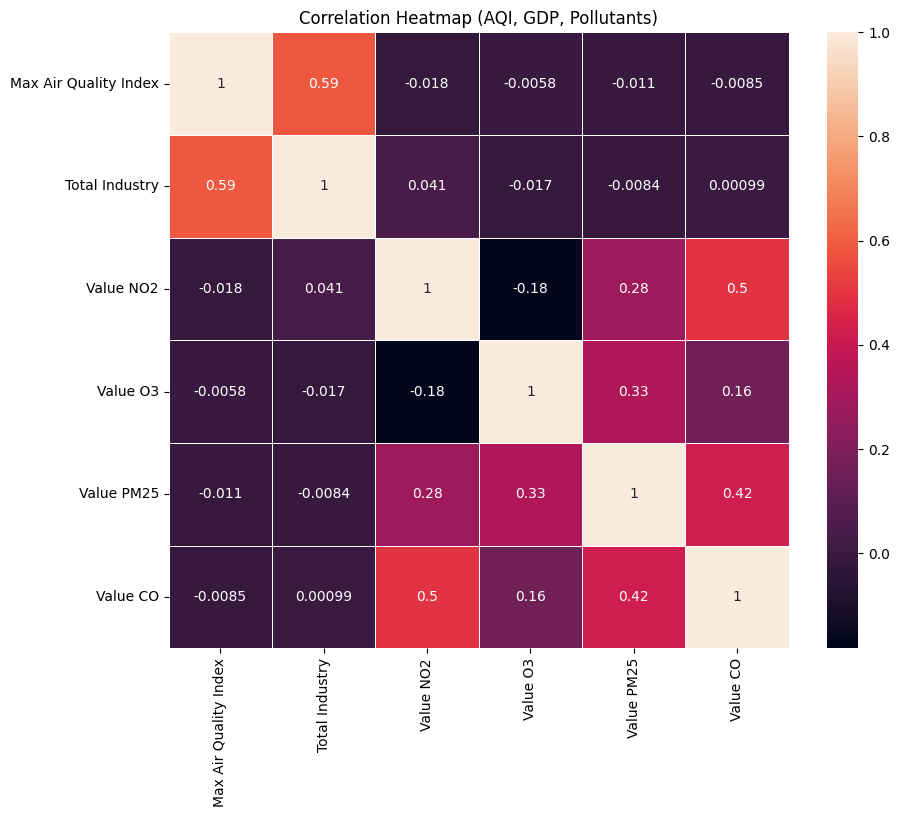

In [ ]:
import seaborn as sns
import pandas as pd

# Compute the correlation matrix
corr = merged_air_quality[['Max Air Quality Index', 'Total Industry' ,'Value NO2', 'Value O3', 'Value PM25', 'Value CO']].corr()
colors = ["#FFEB3B", "#FFC107", "#FF9800", "#F57C00", "#FF5722", "#D32F2F", "#C2185B"]

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, color=colors, linewidths=0.5)
plt.title("Correlation Heatmap (AQI, GDP, Pollutants)")
plt.show()

**How do industrial activity and various air pollutants correlate with air quality levels?**

1. Strong Positive Correlation:

* The "Max Air Quality Index" (AQI) has a notable positive correlation (0.59) with "Total Industry," suggesting that increased industrial activity is linked to poorer air quality.
2. Pollutants Correlation:

* NO2 and CO exhibit a moderate correlation (0.5), indicating that these pollutants may originate from similar sources.
* PM2.5 and CO show a moderate correlation (0.42), signifying that particulate matter pollution is associated with carbon monoxide levels.
* O3 and NO2 have a weak negative correlation (-0.18), implying that high ozone levels might be associated with lower NO2 concentrations.
3. Weak or Negligible Correlation:

* The direct correlation between AQI and pollutants such as NO2, O3, PM2.5, and CO is weak, suggesting that AQI is influenced by multiple factors beyond just these pollutants.
* The industry sector has a near-zero correlation with most pollutants except AQI, implying that other sources contribute significantly to pollution.

**Conclusion:**
Industrial activity significantly impacts air quality, as evidenced by its strong correlation with AQI. However, individual pollutants exhibit varying degrees of correlation with each other and AQI, indicating that multiple sources and factors influence air pollution levels. Policymakers should consider comprehensive pollution control strategies targeting industrial emissions to improve air quality.

## 2. Major Events in these years which contributes to the AQI Levels.

<Figure size 1600x800 with 0 Axes>

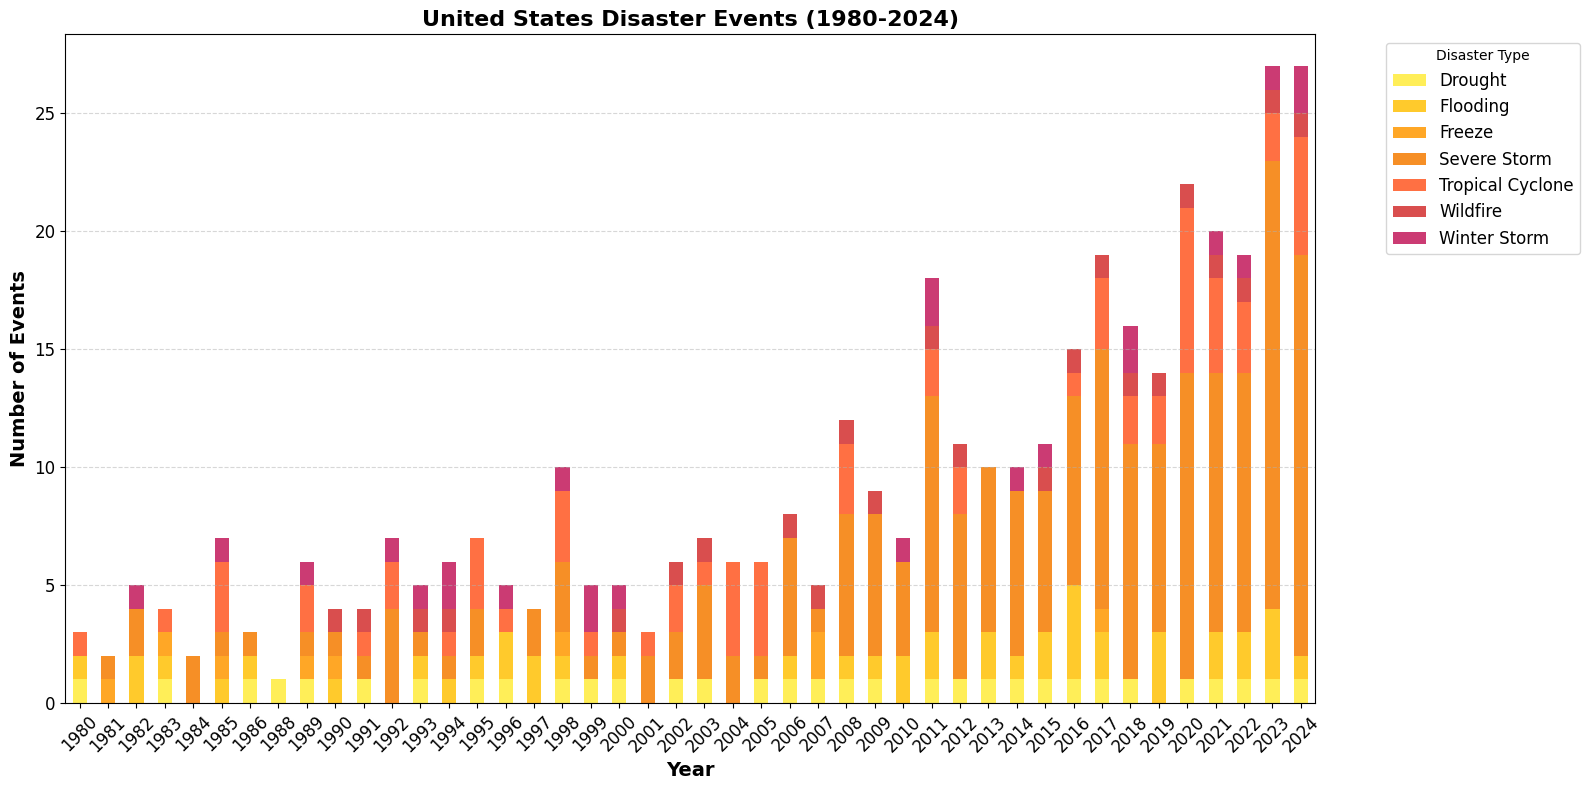

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

! wget -q -O events.csv https://docs.google.com/uc?id=19_xArTxwvqQolJCKpLu3lpVxib9HeE67&export=download
eve = pd.read_csv("events.csv")

# Convert 'Begin Date' to datetime and extract Year
eve["Begin Date"] = pd.to_datetime(eve["Begin Date"], format='%Y%m%d')
eve["Year"] = eve["Begin Date"].dt.year

# Group disaster counts per year
disaster_counts = eve.groupby(["Year", "Disaster"]).size().unstack(fill_value=0)

# Set figure size
plt.figure(figsize=(16, 8))

# Solid yellow and orange shades for the chart (7 distinct colors)
colors = ["#FFEB3B", "#FFC107", "#FF9800", "#F57C00", "#FF5722", "#D32F2F", "#C2185B"]

# Stacked bar chart
disaster_counts.plot(kind="bar", stacked=True, color=colors, alpha=0.85, figsize=(16, 8))

# Titles and Labels
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Events", fontsize=14, fontweight="bold")
plt.title("United States Disaster Events (1980-2024)", fontsize=16, fontweight="bold", color="black")

# Custom Grid
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Legend Styling
plt.legend(title="Disaster Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, frameon=True)

# Enhance X-Ticks and Y-Ticks for better readability
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

**Insights:** The graph shows a clear upward trend in total climate-related disasters since the 1980s — especially post-2000. Severe storms, wildfires, floods etc. dominate the increase.This aligns with growing climate volatility due to global warming, as emissions accumulate.

🔥 Wildfires → Major PM2.5 and CO2 Spike
* Wildfires release massive quantities of PM2.5 (fine particulate matter) and Carbon di-oxide, which severely degrades AQI.

* One large wildfire event can push AQI into hazardous levels for weeks, even hundreds of miles away.

* AQI levels in the Western U.S. (California, Oregon, etc.) have increasingly worsened due to the wildfire season.

💨 Droughts → Dust & Wind-Borne Pollutants
* Droughts dry out soil and vegetation, increasing the risk of dust storms and airborne particles, especially in the Southwest.

* These particles (PM10 and PM2.5) directly increase AQI levels

❄️ Winter Storms → Leads to localized AQI spikes, particularly PM2.5 and NO₂.
* Temperature inversions (common in winter) trap pollutants close to the ground, especially in valleys or urban basins.
* Increased wood burning and heating during cold events emits PM2.5 and CO, especially in areas with older or non-electric heating systems.
* Power outages during storms can lead to generator use, adding more pollutants to the air.



## 3. CO2 EMMISSIONS

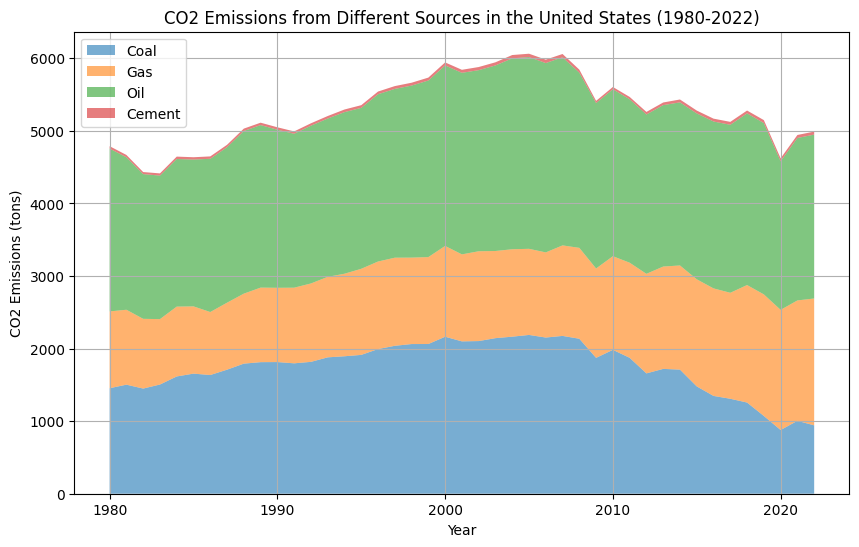

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! wget -q -O CO2EMISION_1980-2024.csv https://docs.google.com/uc?id=1v8RVEFvCrrLyHHONloTnb0uFd24d9lgW&export=download

co2 = pd.read_csv("CO2EMISION_1980-2024.csv") # 2020-2024
# Stacked Area Plot for various CO2 sources
plt.figure(figsize=(10, 6))

# Plot stacked areas for multiple columns like coal, gas, oil, etc.
plt.stackplot(co2['year'], co2['coal_co2'], co2['gas_co2'], co2['oil_co2'], co2['cement_co2'],
              labels=['Coal', 'Gas', 'Oil', 'Cement'], alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.title('CO2 Emissions from Different Sources in the United States (1980-2022)')
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

**Interpretation:**
* Cement production is energy-intensive and releases CO₂ both from fuel combustion and limestone calcination (a chemical process). The link between industrial emissions and urban health impacts (e.g., particulate matter from cement plants) adds urgency to regulating this sector.
* Emissions from gas and oil have been relatively stable, acting as a background contributor to AQI-relevant pollutants like NO₂ and O₃.
* Post-2010, coal emissions dropped sharply, driven by clean energy transitions.
This decline corresponds with a notable improvement in AQI, suggesting coal phase-out played a significant role in cleaning the air.

## 4. Analysis of Air Quality Index (AQI) and Pollutant Trends Over Time

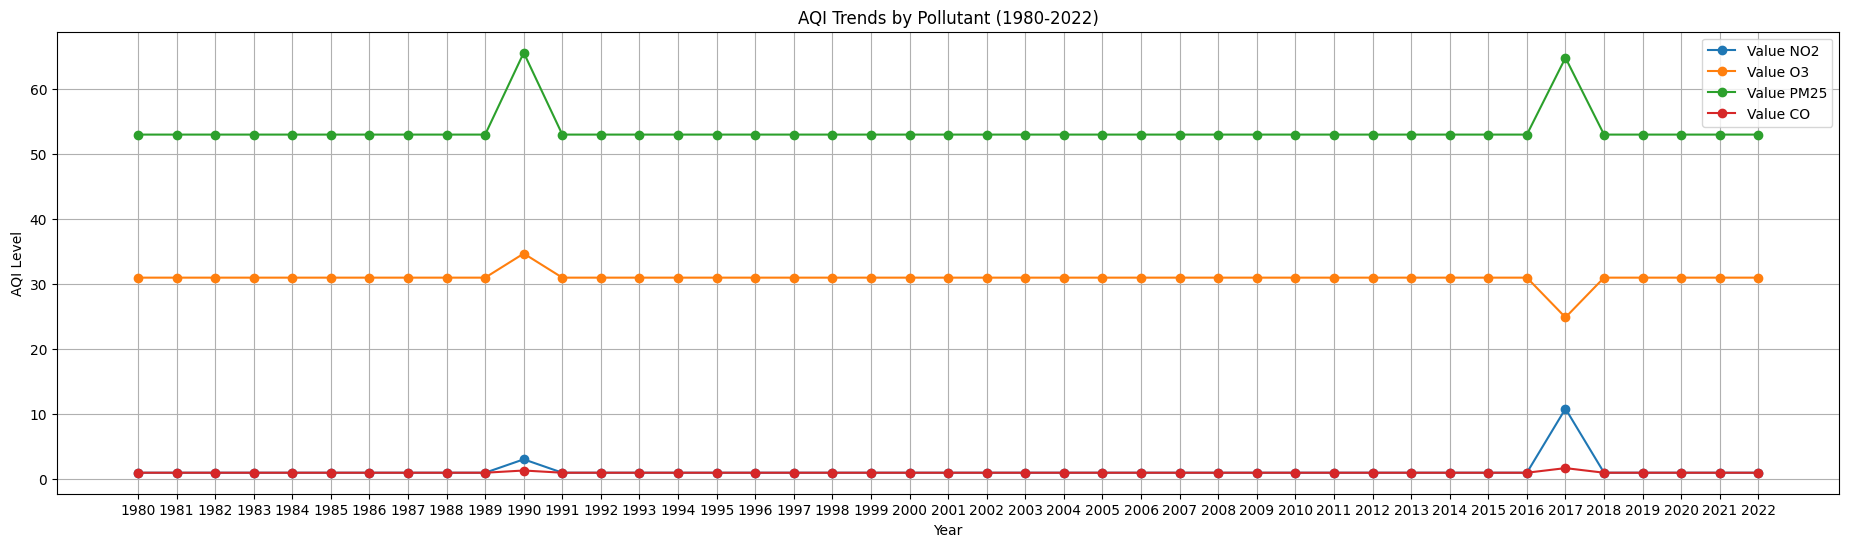

In [ ]:
aqi_columns = ['Value NO2', 'Value O3', 'Value PM25', 'Value CO']

trend_df = merged_air_quality.groupby('Year')[aqi_columns].mean().reset_index()

plt.figure(figsize=(23,6))
for pollutant in aqi_columns:
    plt.plot(trend_df['Year'], trend_df[pollutant],
             marker='o', label=pollutant)
plt.title("AQI Trends by Pollutant (1980-2022)")
plt.xlabel("Year")
plt.ylabel("AQI Level")
plt.legend()
plt.xticks(trend_df['Year'])
plt.grid(True)
plt.show()

**How have AQI levels for major pollutants (NO2, O3, PM2.5, and CO) fluctuated over time, and what significant events or trends have contributed to major spikes in air pollution between 1980 and 2022?**

**1990:** The passing of the Clean Air Act Amendments, economic expansion, and increased vehicle emissions likely caused a temporary spike in pollution levels as industries adjusted to new regulations.

**2017:** Wildfires, the rollback of environmental regulations under the Trump administration, increased industrial activity, and post-recession economic recovery all contributed to spikes in air pollutants.

**Conclusion:**
The analysis highlights a direct relationship between industrial activity and AQI, with pollutants such as NO2 and CO showing interdependence. While AQI has remained stable over time, significant spikes indicate environmental challenges or policy gaps. Future research should explore how specific environmental policies have influenced these trends and how further interventions can improve air quality.

## Industrial Emissions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
! wget -q -O industrial.csv https://docs.google.com/uc?id=1lGAv-7o2NlSlFo8q_YPt--RtY3sdjF-h&export=download
emission = pd.read_csv("industrial.csv")

# RESULTS OF AQI SPIKES

In [ ]:
! wget -q -O asthma_mort_states_2016.csv https://docs.google.com/uc?id=1n85AihPWa5rwYd287z5vfjPuNRE84qxM&export=download
asthma = pd.read_csv("asthma_mort_states_2016.csv")
asthma.head()

,Unnamed: 0,LocationDesc,2010,2011,2012,2013,2014,2015,2016
0,0,Alabama,61,36,57,42,57,52,48
1,1,Alaska,,,,,,NaN,NaN
2,2,Arizona,58,92,80,98,86,76,108
3,3,Arkansas,37,46,30,36,33,30,45
4,4,California,403,403,384,410,407,393,391


In [ ]:
# Remove commas and replace empty strings with NaN
asthma.iloc[:, 2:] = asthma.iloc[:, 2:].replace({',': '', ' ': float('nan')}, regex=True)

# Convert to float
asthma.iloc[:, 2:] = asthma.iloc[:, 2:].astype(float)

# Display the first few rows
asthma.head()

,Unnamed: 0,LocationDesc,2010,2011,2012,2013,2014,2015,2016
0,0,Alabama,61.0,36.0,57.0,42.0,57.0,52.0,48.0
1,1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Arizona,58.0,92.0,80.0,98.0,86.0,76.0,108.0
3,3,Arkansas,37.0,46.0,30.0,36.0,33.0,30.0,45.0
4,4,California,403.0,403.0,384.0,410.0,407.0,393.0,391.0


In [ ]:
#2)melt year columns to average asthma mortality in every state
asthma_melted_df=pd.melt(asthma, id_vars=['LocationDesc'], value_vars=['2010','2011','2012','2013','2014','2015','2016'])
asthma_melted_df.head()

,LocationDesc,variable,value
0,Alabama,2010,61.0
1,Alaska,2010,NaN
2,Arizona,2010,58.0
3,Arkansas,2010,37.0
4,California,2010,403.0


In [ ]:
#rename columns
asthma_melted_df = asthma_melted_df.rename(index=str, columns={"LocationDesc": "State", "variable": "Year", "value":"Asthma Mortality"})
asthma_melted_df.head()
asthma_melted_df.to_csv('asthma_mort_states_melted.csv', index=True, header=True)
asthma_melted_df.head()

,State,Year,Asthma Mortality
0,Alabama,2010,61.0
1,Alaska,2010,NaN
2,Arizona,2010,58.0
3,Arkansas,2010,37.0
4,California,2010,403.0


In [ ]:
# calculate mean asthma mortality of 2010-2016 by state
Avg_asthma_byState = pd.DataFrame(asthma_melted_df.groupby("State")["Asthma Mortality"].mean())
Avg_asthma_byState.head()

,Asthma Mortality
State,
Alabama,50.428571
Alaska,NaN
Arizona,85.428571
Arkansas,36.714286
California,398.714286


In [ ]:
chemfilt = aqi[['State', 'Year','NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
chemfilt.head()

,State,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000,46,34,13.0,25.0
1,Arizona,2000,34,27,4.0,26.0
2,Arizona,2000,48,14,16.0,28.0
3,Arizona,2000,72,28,23.0,34.0
4,Arizona,2000,58,10,21.0,42.0


In [ ]:
chemfilt['Year']=chemfilt['Year'].astype('str')
chemfilt.dtypes
chemfilt=chemfilt[chemfilt['Year'].str.contains('2010|2011|2012|2013|2014|2015|2016')]
chemfilt.head()

<ipython-input-92-12cb61cf7b97>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
242220,Arizona,2010,45,29,9.0,18.0
242221,Arizona,2010,48,21,10.0,15.0
242222,Arizona,2010,52,24,9.0,16.0
242223,Arizona,2010,52,31,13.0,15.0
242224,Arizona,2010,57,25,13.0,15.0


In [ ]:
# 6)merge asthma mortality data with pollt AQIs
merge_final_df = pd.merge(chemfilt, Avg_asthma_byState, on =['State'])

merge_final_df.head()

,State,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Asthma Mortality
0,Arizona,2010,45,29,9.0,18.0,85.428571
1,Arizona,2010,48,21,10.0,15.0,85.428571
2,Arizona,2010,52,24,9.0,16.0,85.428571
3,Arizona,2010,52,31,13.0,15.0,85.428571
4,Arizona,2010,57,25,13.0,15.0,85.428571


In [ ]:
# Group by 'Year' and calculate the mean for selected columns
avg_AQI_asthm_byYear_df = pd.DataFrame(merge_final_df.groupby('Year')[['Asthma Mortality', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].mean())

# Reset the index
avg_AQI_asthm_byYear_df.reset_index(inplace=True)

# Display the result
avg_AQI_asthm_byYear_df

,Year,Asthma Mortality,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2010,206.560239,21.619048,34.873952,4.238372,4.898750
1,2011,190.952421,21.011178,34.924529,4.145762,4.677056
2,2012,176.846929,20.263957,35.646491,3.326040,4.530803
3,2013,181.925039,19.820931,35.963944,2.978427,4.269331
4,2014,177.620775,19.394214,36.922203,3.035975,4.226896
5,2015,174.386577,18.347113,37.239121,2.528072,4.322438
6,2016,173.865554,20.020997,33.687992,2.186680,4.454396


In [ ]:
# rearrange DF by state to look for any corr (asthma mort/pollts) by state

merge_final_df.head()

statesummary=pd.DataFrame(merge_final_df.melt(id_vars=['Year','State']).groupby(['State','variable'])['value'].mean())
statesummary=statesummary.reset_index()
statesummary.head()
statesummary.pivot(index='State',columns='variable')
statesummary
statesummary2=pd.DataFrame(statesummary.pivot_table(index=['State'], columns='variable'))
statesummary2.columns = ['_'.join(tup).rstrip('_') for tup in statesummary2.columns.values]
statesummary2.reset_index(inplace=True)
statesummary2.head()

,State,value_Asthma Mortality,value_CO AQI,value_NO2 AQI,value_O3 AQI,value_SO2 AQI
0,Alabama,50.428571,3.851662,21.2289,36.831202,7.005115
1,Alaska,NaN,6.52834,19.580972,17.712551,14.506073
2,Arizona,85.428571,6.410256,30.883507,41.481798,2.345046
3,Arkansas,36.714286,5.774202,21.624402,35.323898,2.668993
4,California,398.714286,5.53418,20.346237,37.311622,1.515042


## ASTHAMA MORTALITY

## a. Analyzing National Asthma Mortality Rates Across U.S. States

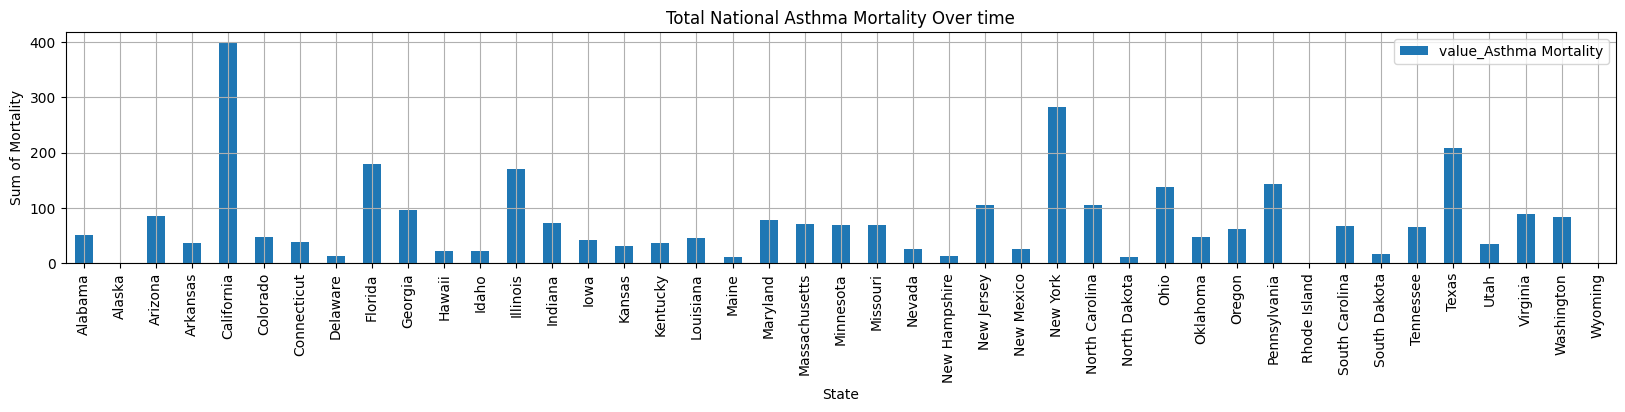

In [ ]:
pollutants2=list(statesummary2.columns[2:])

statesummary2.plot(x='State', y='value_Asthma Mortality', kind="bar", figsize=(20,3))
plt.title("Total National Asthma Mortality Over time")
plt.xlabel("State")
plt.ylabel("Sum of Mortality")
plt.grid()

**How does asthma mortality vary across different U.S. states, and what factors might contribute to these variations?**

1. State-wise Variation:

* California, New York, and Texas show the highest asthma mortality rates, indicating a significant public health concern in these states.
* Other states like Florida, Illinois, and Pennsylvania also exhibit relatively high asthma mortality.
* States such as Alaska, Hawaii, and the Dakotas report significantly lower asthma mortality.
2. Possible Contributing Factors:

* Urban vs. Rural Divide: Higher mortality in populous states could indicate urban air pollution, healthcare disparities, or environmental triggers.
* Climate & Pollution: States with extreme weather conditions or high pollution levels might have elevated asthma-related deaths.
* Healthcare Access: Differences in healthcare infrastructure, insurance coverage, and access to asthma management could explain state-wise disparities.

**Conclusion:**
Asthma mortality varies significantly across states, with urbanized and industrialized states experiencing higher deaths. Further research into environmental factors, healthcare accessibility, and socio-economic conditions can help mitigate asthma mortality through targeted interventions.

## b. Impact of Air Pollutants on Asthma Mortality: A Correlation Analysis

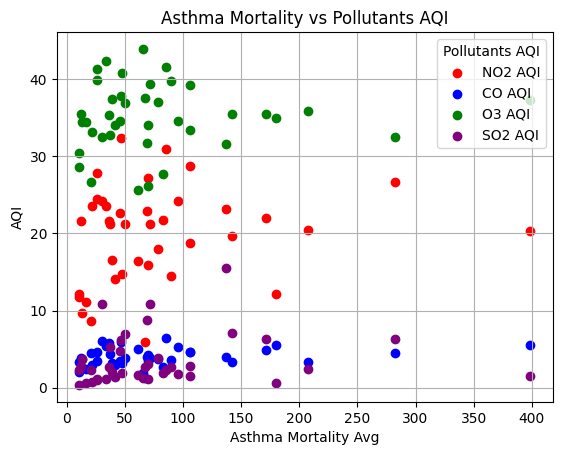

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for different pollutants
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_NO2 AQI'], marker='o', color='red', label='NO2 AQI')
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_CO AQI'], marker='o', color='blue', label='CO AQI')
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_O3 AQI'], marker='o', color='green', label='O3 AQI')
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_SO2 AQI'], marker='o', color='purple', label='SO2 AQI')

# Title and labels
plt.title("Asthma Mortality vs Pollutants AQI")
plt.xlabel("Asthma Mortality Avg")
plt.ylabel("AQI")
plt.grid()

# Legend box in the upper right corner
plt.legend(loc="upper right", title="Pollutants AQI")

# Show plot
plt.show()

**How do different air pollutants (NO₂, CO, O₃, and SO₂) correlate with asthma mortality rates, and which pollutant appears to have the strongest association with increased mortality?**

1. Correlation Between Pollutants and Mortality:

* The scatter plot shows different pollutants (NO₂, CO, O₃, SO₂) plotted against average asthma mortality.
* There is a visible trend where some pollutants (such as NO₂ and O₃) appear to have a higher concentration at elevated asthma mortality levels.
2. NO₂ and O₃ Show Stronger Presence at High Mortality Levels:

* The red (NO₂) and green (O₃) dots are more widely spread across higher mortality levels, suggesting a possible stronger relationship between these pollutants and asthma deaths.
* This aligns with previous research indicating that nitrogen dioxide (NO₂) and ozone (O₃) exacerbate respiratory conditions.
3. CO and SO₂ Show Lower Concentration at High Mortality:

* The blue (CO) and purple (SO₂) dots appear more concentrated at lower mortality values, suggesting they may have a weaker direct impact on asthma deaths or that their presence is lower in high-mortality regions.

**Conclusion:**
This analysis suggests a possible link between NO₂ and O₃ air pollution and increased asthma mortality rates. Policymakers and public health officials should prioritize monitoring and controlling these pollutants to mitigate their impact on respiratory health. Further statistical validation and regional case studies could strengthen the evidence for targeted interventions.

## LUNG CANCER

In [ ]:
! wget -q -O lungcancer-aqi.xlsx  https://docs.google.com/uc?id=1Rp90mjFLGsv60CSQhpWeDXI-vJwso8iZ&export=download

lc = pd.read_excel("lungcancer-aqi.xlsx")

In [ ]:
print(lc.columns)

Index(['FIPS_code', 'County', 'State', 'Lung Cancer', 'PM2.5',
       'Status Variable', 'Land_EQI', 'Sociod_EQI', 'Built_EQI', 'LTD',
       'Intercept', 'Slope', 'CLU50_1', 'PM10', 'SO2', 'NO2', 'O3', 'CO', 'CN',
       'Disel', 'CS2', 'Air_EQI', 'Water_EQI', 'EQI', 'Status', 'LCI', 'UCI',
       'Inter', 'Slp', 'control', 'treat', 'Local_Treat', 'AAC', 'RT'],
      dtype='object')


In [ ]:
pip install dash plotly pandas

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html, Input, Output

# Mapping of state abbreviations to full names
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
lc['State Full'] = lc['State'].map(us_state_abbrev)

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Lung Cancer and Pollution Analysis"),
    dcc.Dropdown(
    id='state-dropdown',
    options=[{'label': state, 'value': state} for state in lc['State Full'].dropna().unique()],
    value='New Jersey'
    ),

    html.Div([
        dcc.Graph(id='lung-cancer-map', style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='pollutants-bar', style={'width': '48%', 'display': 'inline-block'})
    ])
])

@app.callback(
    [Output('lung-cancer-map', 'figure'), Output('pollutants-bar', 'figure')],
    [Input('state-dropdown', 'value')]
)
def update_charts(selected_state):
    state_data = lc[lc['State Full'] == selected_state]

    # Lung Cancer Map
    fig_map = px.choropleth(
        state_data,
        geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
        locations='FIPS_code',
        color='Lung Cancer',
        hover_data=['County'],
        title=f"Lung Cancer Rates in {selected_state}",
        color_continuous_scale="Reds"
    )
    fig_map.update_geos(fitbounds="locations", visible=False)

    # Pollutant Bar Chart
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO', 'Disel']
    avg_pollutants = state_data[pollutants].mean()
    fig_bar = go.Figure(
        data=[go.Bar(x=pollutants, y=avg_pollutants, marker_color='#FFC107')]
    )
    fig_bar.update_layout(title=f"Pollutant Levels in {selected_state}", xaxis_title="Pollutants", yaxis_title="Average Level")

    return fig_map, fig_bar

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

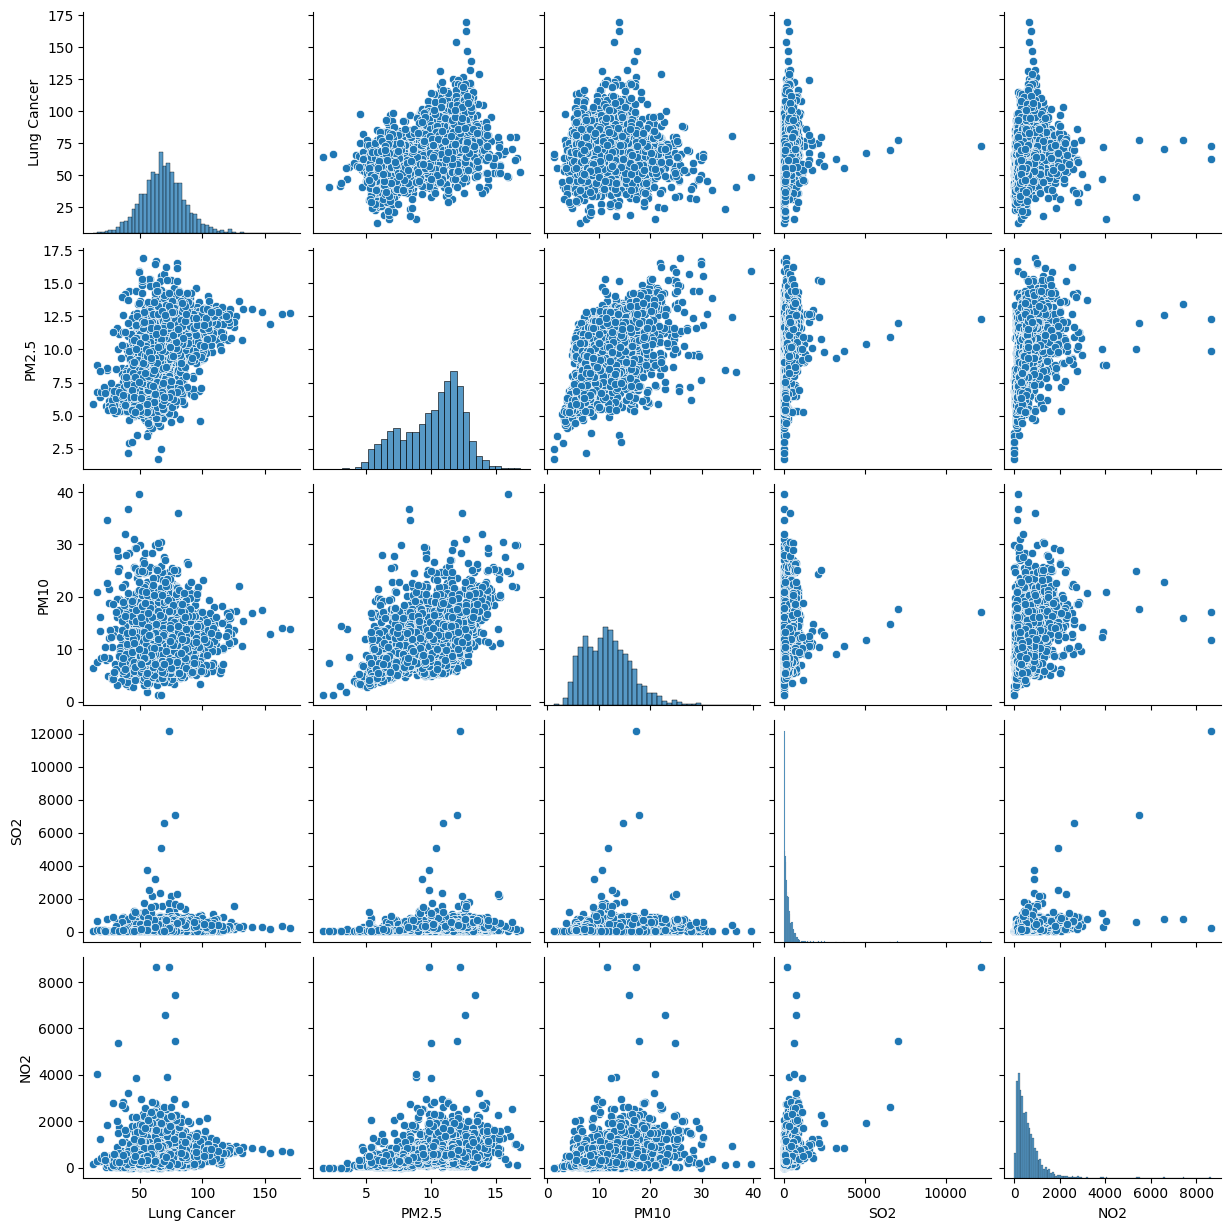

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pairplot
df_pair = lc[['Lung Cancer', 'PM2.5', 'PM10', 'SO2', 'NO2']]

# Create pairplot
sns.pairplot(df_pair)
plt.show()

# FORECAST

##PROPHET

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuoymdaer/5wrmmny3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuoymdaer/8m3e9urm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84527', 'data', 'file=/tmp/tmpuoymdaer/5wrmmny3.json', 'init=/tmp/tmpuoymdaer/8m3e9urm.json', 'output', 'file=/tmp/tmpuoymdaer/prophet_model11y_thas/prophet_model-20250410210952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


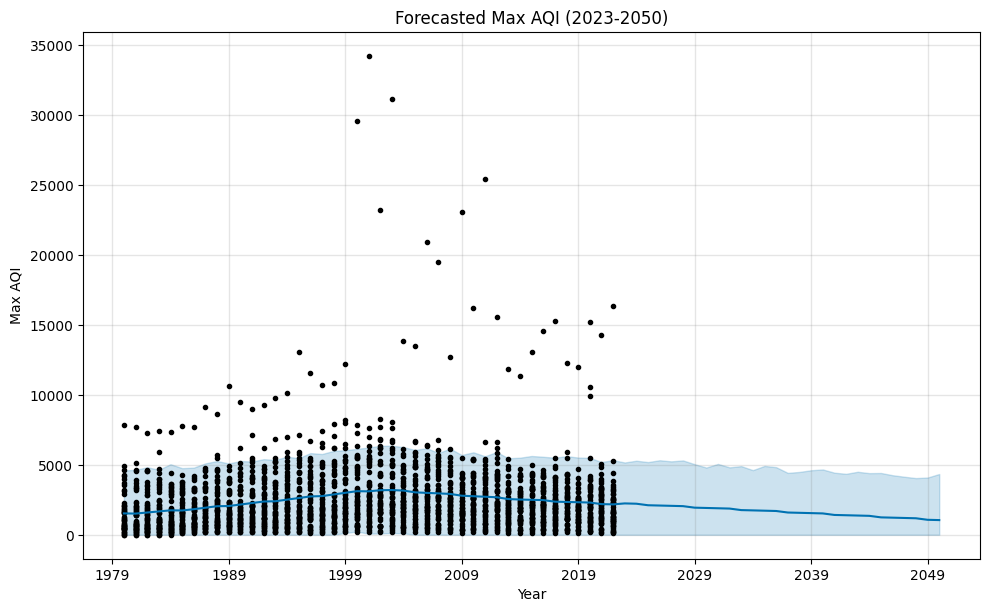

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
import warnings

# Ignore warnings for cleaner output
warnings.simplefilter("ignore", category=FutureWarning)
plt.style.use('default')

# Load your AQI dataset (replace 'new' with your DataFrame name)
df = new[['Year', 'Max AQI']].dropna()

# Rename columns to fit Prophet's expectations
df.rename(columns={'Year': 'ds', 'Max AQI': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%Y')

# Initialize Prophet with more flexible parameters
model = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10,
    yearly_seasonality=True
)

# Fit the model to data
model.fit(df)

# FORECASTING
# Create a future DataFrame extending to 2050
future = model.make_future_dataframe(periods=28, freq='A-DEC')  # Yearly till 2050
forecast = model.predict(future)

# Ensure no negative AQI values appear
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecasted Max AQI (2023-2050)")
plt.xlabel("Year")
plt.ylabel("Max AQI")
plt.show()

**Forecast (2023-2030):**

* The blue line shows the predicted trend for maximum AQI.
* The shaded area represents the confidence interval — the lighter the shade, the more uncertainty in the prediction.
* It looks like the forecast shows a slight decline or stabilization in AQI values, but the spread (uncertainty) increases over time.

**Interpretation:**

* If the model holds, AQI may slightly improve or stay constant in the coming years — but the large uncertainty band implies the possibility of worsening air quality in some regions.
* Those extreme outliers in the past (e.g., above 30000 AQI) could hint at data issues, exceptional events, or regional pollution spikes that should be analyzed separately.

In [ ]:
# PERFORMANCE EVALUATION
# Cross-validation to assess model performance (now using days instead of years)
cv_results = cross_validation(
    model,
    initial='10950 days',  # ~30 years
    period='1095 days',  # ~3 years
    horizon='1825 days'  # ~5 years
)

# Calculate performance metrics
metrics = performance_metrics(cv_results)
print("\nModel Performance Metrics:\n", metrics[['horizon', 'rmse', 'mae', 'mape']])

INFO:prophet:Making 3 forecasts with cutoffs between 2011-01-04 00:00:00 and 2017-01-02 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuoymdaer/u0os3cac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuoymdaer/llxwjcq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15432', 'data', 'file=/tmp/tmpuoymdaer/u0os3cac.json', 'init=/tmp/tmpuoymdaer/llxwjcq8.json', 'output', 'file=/tmp/tmpuoymdaer/prophet_model5hczs6iz/prophet_model-20250410210953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuoymdaer/ubns_5an.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuoymdaer/xvad2_z9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


Model Performance Metrics:
      horizon         rmse          mae      mape
0   363 days  2111.398055  1361.406765  1.261005
1   364 days  1939.939092  1267.892465  1.176547
2   728 days  1984.291189  1272.001308  1.400306
3   729 days  1827.809947  1132.510728  1.287570
4  1093 days  1755.193063  1173.058823  1.316469
5  1094 days  2490.500000  1431.027315  1.284588
6  1458 days  2138.884892  1324.480000  1.315214
7  1459 days  1945.784515  1275.688287  1.173621
8  1460 days  2049.358837  1242.524507  1.068746
9  1823 days  2103.416861  1261.324868  1.240987
10 1824 days  1869.285926  1122.640500  1.236388
11 1825 days  2142.260508  1171.329315  1.295683


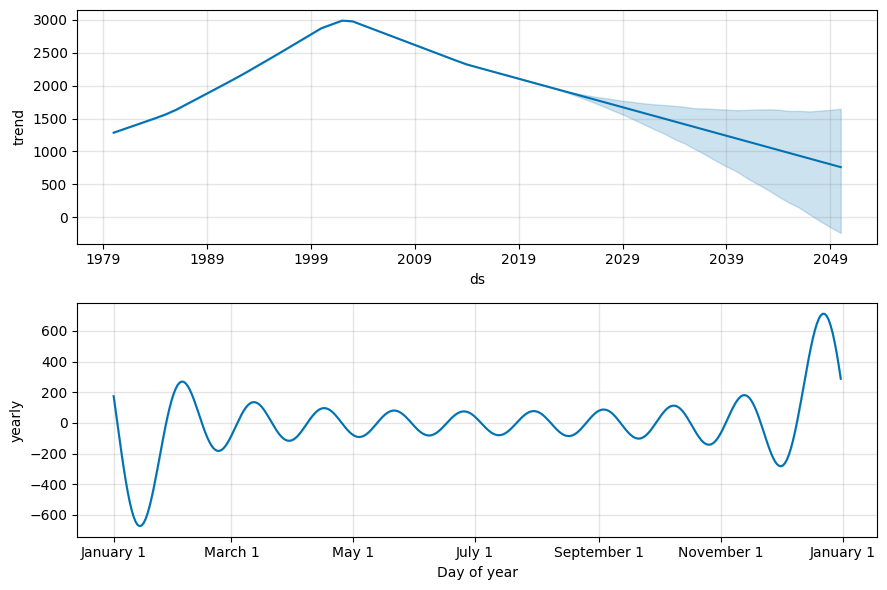

In [ ]:
# trend, seasonality, and holiday effects
model.plot_components(forecast)
plt.show()

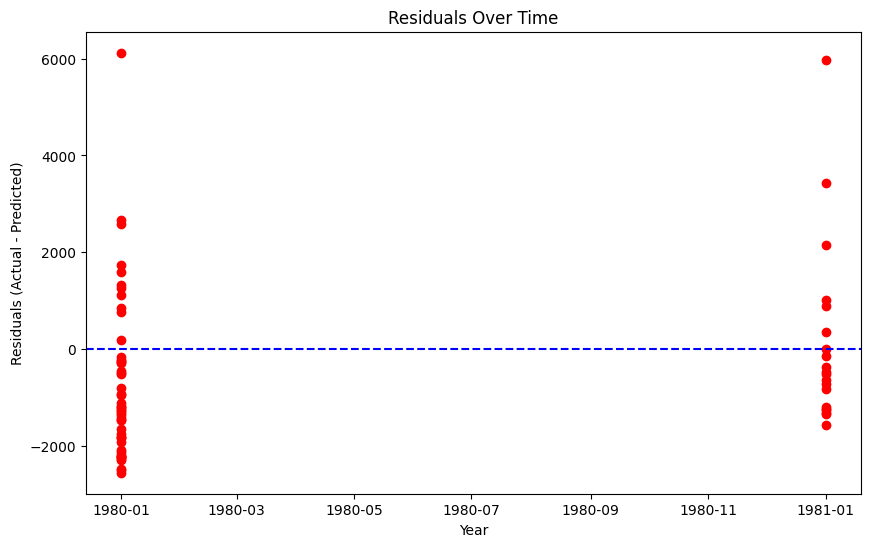

In [ ]:
# Residuals
df['yhat'] = forecast['yhat'][:len(df)]
df['residuals'] = df['y'] - df['yhat']

# Scatter plot to check residual behavior over time
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['residuals'], color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Year')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Conclusion

Over the past four decades, the United States has made notable progress in mitigating certain types of air pollution. Our analysis reveals a clear correlation between pollutant levels and adverse health outcomes, such as asthma prevalence and lung cancer mortality. Notably, PM2.5 and ground-level ozone (O₃) emerge as the most influential pollutants affecting public health.

Geospatial analysis highlighted vulnerable regions — especially densely populated urban areas and industrial zones — where pollution levels and respiratory illnesses are disproportionately high. Despite improvements in national averages, these localized disparities demand attention.

Our forecasting model suggests that, without stronger interventions, air quality improvements may plateau or even reverse in some areas by 2050. As climate events like wildfires and heatwaves become more frequent, their compounding effect on air quality must also be considered in long-term planning.

Ultimately, while progress is evident, the data answers our central question — "**Are we doing enough?**" — with a cautious "**not yet**."

# Policy Implications:
* **Green Infrastructure Investment**

  Expand urban green spaces and incentivize carbon-reducing technologies in transportation and manufacturing, helping mitigate pollution at the source.
* **Pollutant-Specific Regulation**

  Strengthen regulatory standards for PM2.5 and ozone — the pollutants most strongly associated with poor health outcomes. Federal and state agencies should revisit emission thresholds and consider health-based revisions.

* **Localized Pollution Control**

  Adopt hyper-local strategies tailored to high-risk zones (e.g., California’s Central Valley, Rust Belt states). This includes expanding air quality monitoring networks in underserved and highly impacted regions.

* **Health-Integrated Environmental Planning**

  Integrate public health data into environmental regulation. Mandate collaboration between EPA, CDC, and local health departments to ensure pollution mitigation strategies account for community health burdens.

* **Disaster-Responsive Air Quality Initiatives**

  As climate-related disasters (wildfires, droughts) increasingly degrade air quality, create flexible response policies (e.g., emergency clean air shelters, mobile air filtration units) tied to disaster frequency patterns.

* **Public Awareness and Behavioral Nudges**

  Launch education campaigns to inform communities about daily AQI readings and promote behavior changes (e.g., reduced car use, indoor air filters), especially during pollution spikes.